In [1]:
!pip install ddeint
!pip install scipy
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import random
from ddeint import ddeint
import math as m


Using legacy 'setup.py install' for ddeint, since package 'wheel' is not installed.
    Running setup.py install for ddeint: started
    Running setup.py install for ddeint: finished with status 'done'


You should consider upgrading via the 'c:\python\python391\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\python\python391\python.exe -m pip install --upgrade pip' command.


In [2]:
# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I0 and R0

In [3]:
I0, R0 = 1, 0

# Everyone else, S0, is susceptible to infection initially

In [4]:
S0 = N - I0 - R0

In [5]:
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10

# The SIR model differential equations

In [6]:
from math import exp
# A grid of time points (in days)
t = np.linspace(0,365, 365)
t=t.astype(int)
tau=random.randint(180,240)


def model(y,t, N, beta, gamma):

  S, I, R = y
  dSdt = -beta*S*I/N 
  dIdt = beta*S*I/N - gamma*I
  dRdt = gamma*I

  return dSdt, dIdt, dRdt



In [7]:
#dS/dt= lambda beta,I,S,t,tau,gamma : -beta*S*I  +gamma*I(t - tau)


C:\Python\Python391\lib\site-packages\ddeint\ddeint.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([g(tt[0])] + results)


NameError: name 'set_ylim' is not defined

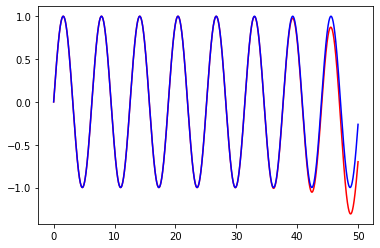

In [8]:

from pylab import *
from ddeint import ddeint

model = lambda Y,t : Y(t - 3*pi/2) # Model
tt = linspace(0,50,10000) # Time start, time end, nb of points/steps
g=sin # Expression of Y(t) before the integration interval
yy = ddeint(model,g,tt) # Solving

# PLOTTING
plot(tt,yy,c='r',label="$y(t)$")
plot(tt,sin(tt),c='b',label="$sin(t)$")
set_ylim(ymax=2) # make room for the legend
legend()

In [ ]:


#I=1
#S = S0*m.exp(beta*I*t/N)
#S_model=ddeint(dSdt,S,t)


In [11]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(model, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


TypeError: <lambda>() takes 2 positional arguments but 5 were given

NameError: name 'S' is not defined

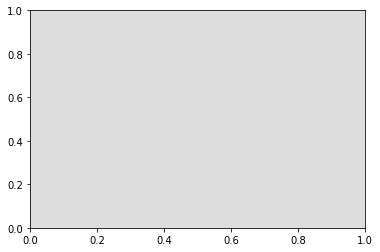

In [10]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()